In [34]:
%display latex
%matplotlib widget
from IPython.display import display, clear_output, Video, display_markdown
import matplotlib.pyplot as plt
from matplotlib.patches import * 

# Homework 9

## Problem 1

A beam of blue light at a frequency of 6.29 x 10^14 Hz passes through a transparent material 5.60 cm thick in 307 ps. Find:

            (a) the speed of the light in the material;

            (b) the index of refraction of the material;

            (c) the wavelength of the light in the material.

Note: the abbreviation “ps” is for “picoseconds”, where “pico” means 10-12.
Enter your answer for Part (c), in nm, in the box below.


In [2]:
frequency = 6.29 * 10**14 * units.frequency.hertz
material_thickness = 5.60 * units.length.centimeter
time_to_pass = 307 * units.time.second * 10**-12 # Time to pass through material

speed_through_material = (material_thickness / time_to_pass).convert(units.length.meter / units.time.second)
display_markdown("### a) Speed of light in the material: ")
display(speed_through_material)

# Index of refraction is the "change in speed of light through the material"
speed_of_light = 299_792_458 * (units.length.meter / units.time.second)

index_of_refraction = speed_of_light / speed_through_material
display_markdown("### b) Index of refraction: ")
display(index_of_refraction)

# Wavelength is should be in length, so for the speed in the material we need to get rid of the time component, frequency is cylces/second so we can divide by that to get the wavelength which is distance per cycle
wavelength_in_material = speed_through_material / frequency.convert(1.0 / units.time.second)
display_markdown("### c) Wavelength in material (nm): ")
display(wavelength_in_material.simplify())

'### a) Speed of light in the material: '

1.82410423452769e8*(meter/second)

'### b) Index of refraction: '

1.64350508225000

'### c) Wavelength in material (nm): '

(2.90000673215848e-07)*meter

## Problem 2

A scuba diver in a freshwater lake notices that the sun appears to be 54.0O above the horizon. Find the actual position of the sun, as an angle above the horizon.

In [3]:
appearant_angle = 54 * units.angles.degree
ior_air = 1.00
ior_water = 1.33

# Snells law states n_1 sin \theta_1 = n_2 sin \theta_2

appearant_angle_normal = 90 * units.angles.degree - appearant_angle

var('angle_normal')
assume(angle_normal, 'real')

eq = ior_air * sin(angle_normal) == ior_water * sin(appearant_angle_normal.convert(units.angles.radian) / units.angles.radian)
angle_normal = solve(eq, angle_normal)[0].rhs()
angle = 90 * units.angles.degree - (angle_normal * units.angles.radian).convert(units.angles.degree)

display_markdown("### Angle of sun from horizon.")
display((angle / units.angles.degree).n())


'### Angle of sun from horizon.'

38.5785128664030

## Problem 3

A horizontal ray of light enters a prism, as shown. The prism is an isosceles triangle with an apex angle of 50.0O and is made of glass with an index of refraction of 1.45. Find the angle the ray exiting the prism makes with the horizontal.

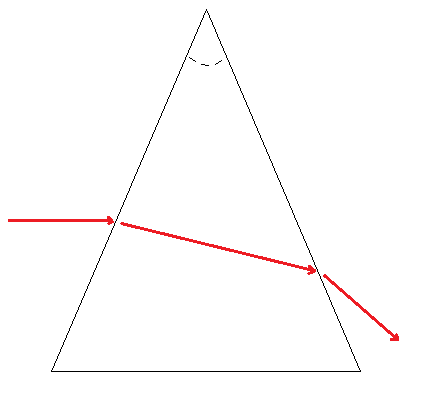

In [64]:
prism_apex_angle = 50.0 * units.angles.degree
ior_glass = 1.43
ior_air = 1.00

# Snells law directly solving for theta 2

var('theta1 theta2 n1 n2')
snells_law = n1 * sin(theta1) == n2 * sin(theta2)
theta2 = solve(snells_law, theta2)[0].rhs().simplify()
snells_law(n1, n2, theta1) = theta2.subs(n1=n1, n2=n2, theta1=theta1)

normal1_elevation = (prism_apex_angle.convert(units.angles.radian) / units.angles.radian).n() / 2
normal1_elevation = (-normal1_elevation + pi).n()

normal2_elevation = (prism_apex_angle.convert(units.angles.radian) / units.angles.radian).n() / 2

angle1 = pi.n() - normal1_elevation
angle2 = (normal2_elevation + pi.n()) - (snells_law(ior_air, ior_glass, angle1) + normal1_elevation)
angle3 = normal2_elevation - snells_law(ior_glass, ior_air, angle2)

(-angle3 / pi.n() * 180.0)

25.7921277068469

## Problem 4

Light enters the left side of a triangular glass prism with an apex angle of 53.0O so that the angle of incidence is 23.0O. The light emerges from the right side of the prism with a total deviation of 57.0O. Find the index of refraction of the glass.

In [ ]:
apex_angle = (53.0 * units.angles.degree).convert(units.angles.radian)
angle_of_incidence = (23.0 * units.angles.degree).convert(units.angles.radian)
total_deviation = (57.0 * units.angles.degree).convert(units.angles.radian)

# Drawing of the problem

def intersect_line(p1, p2, p3, p4):

    # p1(t) = d * t + a
    # p2(t) = d * t + b
    # p1(t) - p2(t) = 0
    # d1 * t + a - d2 * t - b
    # t * (d1 - d2) + a - b = 0
    # t = (b - a) / (d1 - d2)
    
    slope1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
    slope2 = (p4[1] - p3[1]) / (p4[0] - p3[0])

    t = () 
    

    

normal2_angle = apex_angle / 2 # This is the elevation from the horizon. It is rotated because to get angle we add 90 then subtract to rotate so the net is nothing.
normal1_angle = apex_angle

normal2 = alpha
normal1 = (-alpha) + pi

refraction_equation_1 = sin(theta1) == n * sin(theta2)
refraction_equation_2 = n * sin(theta3) == sin(theta4)
initial_angle_relation = theta1 + delta == 